In [31]:
import cv2
import matplotlib.pyplot as plt

In [32]:
def img_plt(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 2, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


def hist_plt_gray(hist, title, pos, color, t=-1):
    """Shows the histogram using matplotlib capabilities"""

    ax = plt.subplot(3, 2, pos)
    plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.axvline(x=t, color='m', linestyle='--')
    plt.plot(hist, color=color)

# Create the dimensions of the figure and set title and color:
fig = plt.figure(figsize=(11, 10))
plt.suptitle("Otsu's binarization algorithm applying a Gaussian filter", fontsize=14, fontweight='bold')
plt.rcParams['figure.facecolor'] = '#b1eef0'

<Figure size 792x720 with 0 Axes>

In [33]:
#Loading the image:
image = cv2.imread("images/leaf-noise.png")

#converting Original Image to GrayScale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Blurring the GRAYSCALE Image using a Gaussian filter to eliminate noise
gray_image_blurred = cv2.GaussianBlur(gray_image, (25, 25), 0)

In [34]:
# Calculating the histogram
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

#Calculating histogram after blurring:
hist2 = cv2.calcHist([gray_image_blurred], [0], None, [256], [0, 256])

__OTSU BINARIZATION__  on grayscale image, and grayscale blurred image

In [35]:
# Otsu's binarization algorithm:
ret1, th1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's binarization algorithm:
ret2, th2 = cv2.threshold(gray_image_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

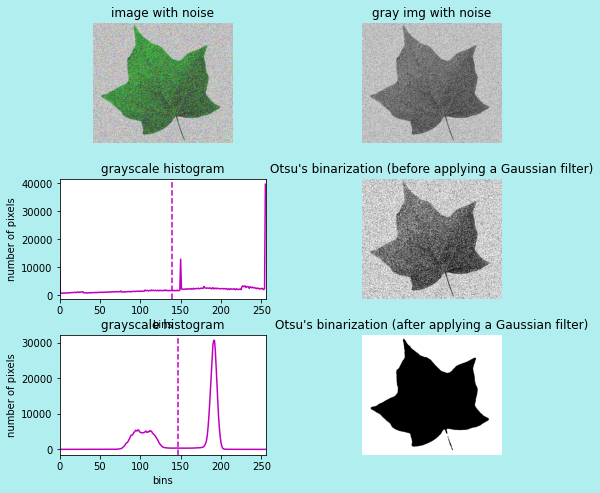

In [36]:
# Plot all the images:
img_plt(image, "image with noise", 1)
img_plt(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR), "gray img with noise", 2)
hist_plt_gray(hist, "grayscale histogram", 3, 'm', ret1)
img_plt(cv2.cvtColor(th1, cv2.COLOR_GRAY2BGR),"Otsu's binarization (before applying a Gaussian filter)", 4)
hist_plt_gray(hist2, "grayscale histogram", 5, 'm', ret2)
img_plt(cv2.cvtColor(th2, cv2.COLOR_GRAY2BGR),"Otsu's binarization (after applying a Gaussian filter)", 6)

plt.subplots_adjust(top=3,bottom=1.5, right=1.3, left=0.2, wspace=0.3, hspace=0.3)
plt.show()
